In [1]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("titanic.csv")

In [3]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [4]:
X = df[:,1:]
Y = df[:,0]

In [5]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [7]:
model = Sequential()

In [8]:
model.add(Dense(units=4*8,input_dim=4,
                kernel_initializer='uniform', 
                activation='relu'))

In [9]:
model.add(Dense(units=4*7,
                kernel_initializer='uniform', 
                activation='relu'))

In [10]:
model.add(Dense(units=4*6,
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=4*5,
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=4*4,
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=4*3,
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=4*2,
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=4,
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 28)                924       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                696       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
__________

In [18]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2,callbacks=[early_stopping])

Train on 941 samples, validate on 105 samples
Epoch 1/30
 - 2s - loss: 0.6917 - acc: 0.6057 - val_loss: 0.6892 - val_acc: 0.6571
Epoch 2/30
 - 0s - loss: 0.6894 - acc: 0.6057 - val_loss: 0.6853 - val_acc: 0.6571
Epoch 3/30
 - 0s - loss: 0.6868 - acc: 0.6057 - val_loss: 0.6813 - val_acc: 0.6571
Epoch 4/30
 - 0s - loss: 0.6842 - acc: 0.6057 - val_loss: 0.6774 - val_acc: 0.6571
Epoch 5/30
 - 0s - loss: 0.6818 - acc: 0.6057 - val_loss: 0.6730 - val_acc: 0.6571
Epoch 6/30
 - 0s - loss: 0.6793 - acc: 0.6057 - val_loss: 0.6684 - val_acc: 0.6571
Epoch 7/30
 - 0s - loss: 0.6746 - acc: 0.6057 - val_loss: 0.6557 - val_acc: 0.6571
Epoch 8/30
 - 0s - loss: 0.6170 - acc: 0.6057 - val_loss: 0.5699 - val_acc: 0.6571
Epoch 9/30
 - 0s - loss: 0.5655 - acc: 0.6057 - val_loss: 0.5652 - val_acc: 0.6571
Epoch 10/30
 - 0s - loss: 0.5571 - acc: 0.6057 - val_loss: 0.5593 - val_acc: 0.6571
Epoch 11/30
 - 0s - loss: 0.5489 - acc: 0.6057 - val_loss: 0.5576 - val_acc: 0.6571
Epoch 12/30
 - 0s - loss: 0.5404 - acc:

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

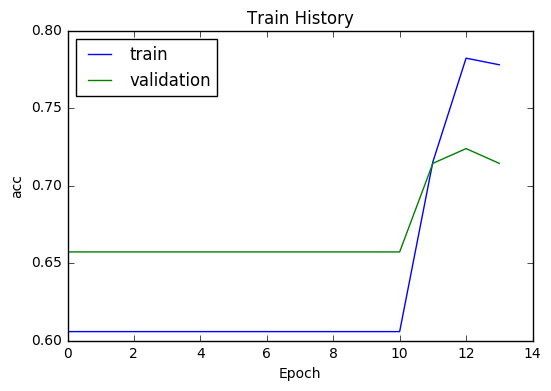

In [21]:
show_train_history(train_history,'acc','val_acc')

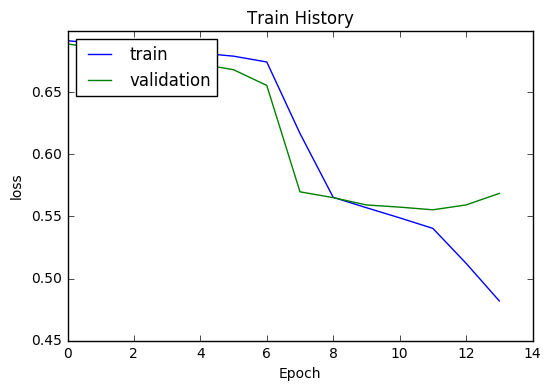

In [22]:
show_train_history(train_history,'loss','val_loss')

In [23]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 51us/step


In [24]:
scores[1]

0.7900763354228653